## Questions:

Please answer the following questions directly in this notebook. The dataset is provided as a dataframe called `df`

Solve the problems using code, and include written explanations to provide additional context.

Question 1:
Explore this e-commerce dataset and provide basic insights about:
- Overall sales trends
- Customer segment distribution 
- Product category performance

Question 2:
Calculate the following:
- Average purchase amount per customer segment
- Monthly sales trends
- Correlation between purchase amount and customer rating
- Use a simple method to predict Electronics sales in the 2 months following the data set. You can use a quick & simply methodology, but indicate in writing how you'd improve the prediction if you had more time.

Question 3:
Create visualizations to show:
- Monthly sales trends by product category
- Distribution of purchase amounts
- Customer ratings distribution by segment

Question 4: 
Based on your analysis:
- Which customer segment is most valuable?
- What is the best-performing product category?
- Any recommendations for improving sales?

In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('ecommerce_data.csv')
#Ensuring data types, category type its better than object for categorical information
df['date'] = pd.to_datetime(df['date'])
df['product_category'] = df['product_category'].astype('category')
df['customer_segment'] = df['customer_segment'].astype('category')
print(df.info())

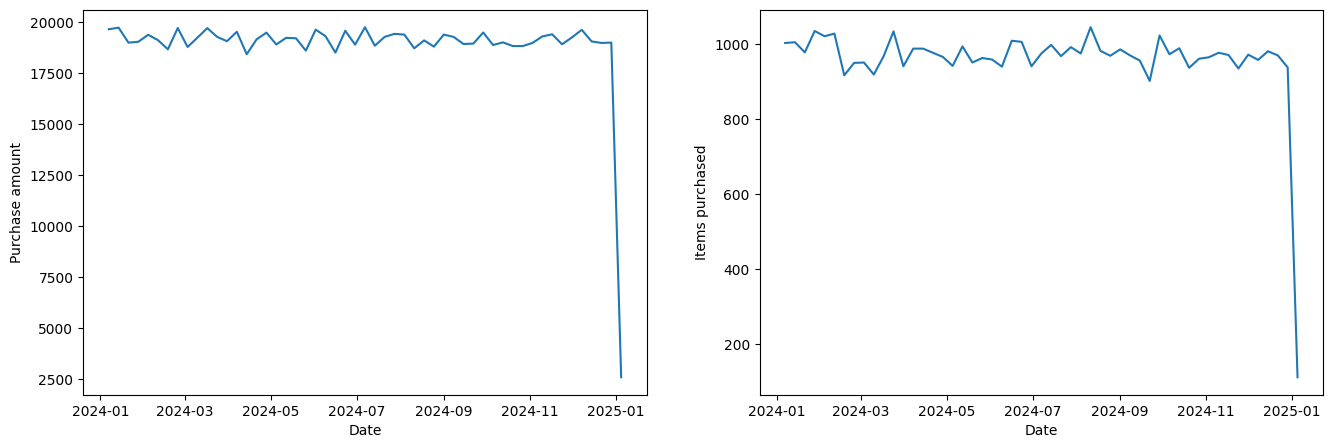

         date  purchase_amount  items_purchased
52 2025-01-05      2579.118236              112
14 2024-04-14     18434.022193              987
23 2024-06-16     18514.908195             1008
20 2024-05-26     18612.378273              962
6  2024-02-18     18676.468859              916


In [4]:
# Question 1:
# Explore this e-commerce dataset and provide basic insights about:
# - Overall sales trends

# Average sales trends by week
weekly_sales = df.resample('W', on='date').agg({'purchase_amount': 'sum','items_purchased': 'sum'}).reset_index()

fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=False, sharex=False)

sns.lineplot(weekly_sales, x='date', y='purchase_amount', ax=axes[0])
sns.lineplot(weekly_sales, x='date', y='items_purchased', ax=axes[1])
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Purchase amount')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Items purchased')
plt.show()
print(weekly_sales.sort_values(by='purchase_amount', ascending=True).head())

C:\Users\Pedro Cunha\AppData\Local\Temp\ipykernel_7068\591984145.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segmented_customer_type = df.groupby('customer_segment').agg({


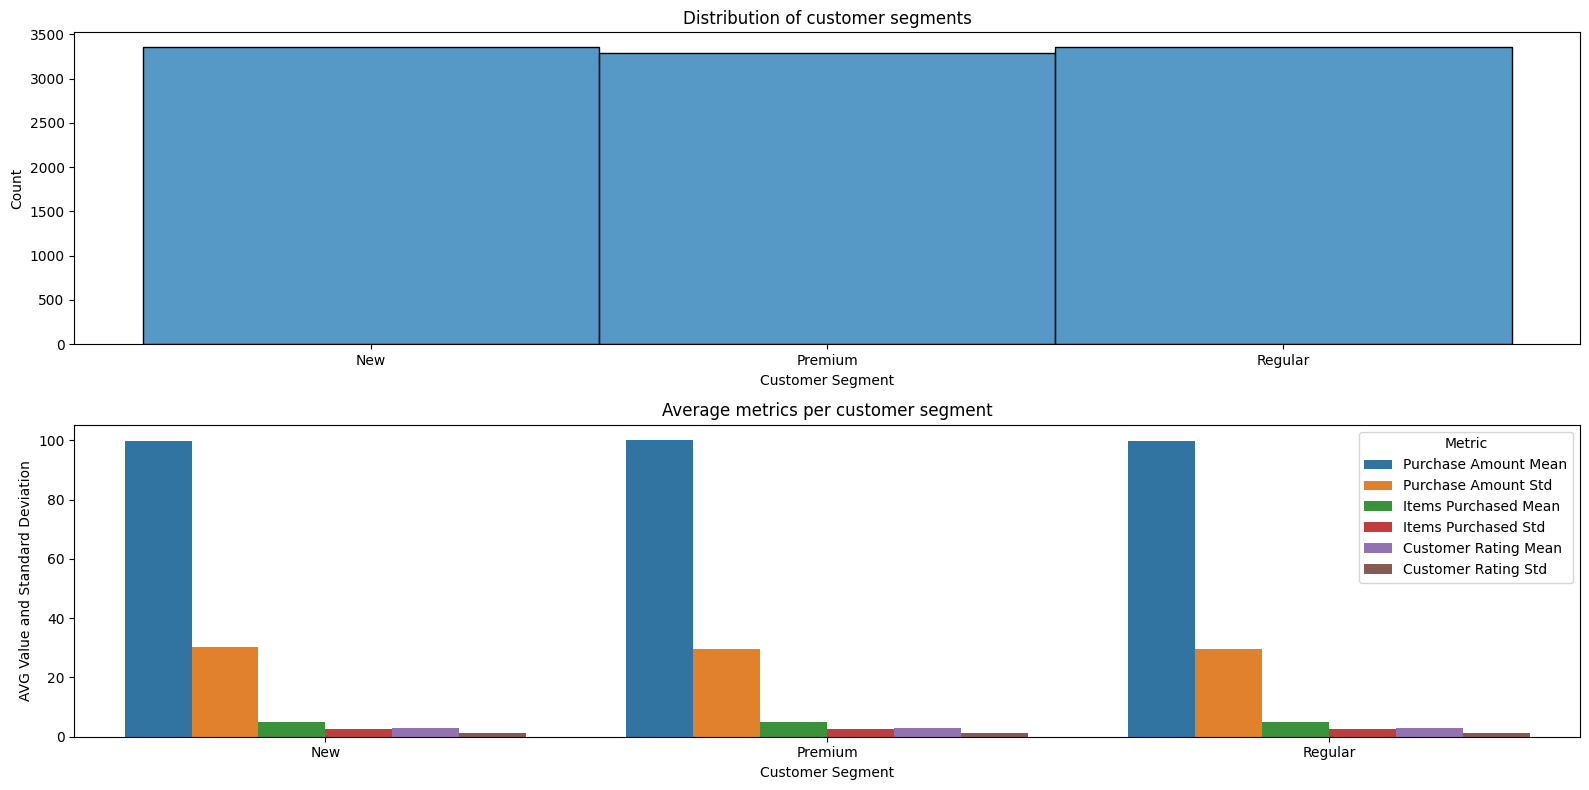

In [5]:
# Question 1:
# Explore this e-commerce dataset and provide basic insights about:
# - Customer segment distribution 

segmented_customer_type = df.groupby('customer_segment').agg({
    'purchase_amount': ['mean', 'std'],
    'items_purchased': ['mean', 'std'],
    'customer_rating': ['mean', 'std'],
}).reset_index()
segmented_customer_type.columns = ['_'.join(col).strip() if col[1] else col[0] for col in segmented_customer_type.columns.values]
segmented_customer_type = segmented_customer_type.rename(columns={
    'purchase_amount_mean': 'Purchase Amount Mean',
    'purchase_amount_std': 'Purchase Amount Std',
    'items_purchased_mean': 'Items Purchased Mean',
    'items_purchased_std': 'Items Purchased Std',
    'customer_rating_mean': 'Customer Rating Mean',
    'customer_rating_std': 'Customer Rating Std'
})
segmented_customer_type = pd.melt(
    segmented_customer_type, 
    id_vars='customer_segment', 
    var_name='Metric', 
    value_name='AVG Value and Standard Deviation'
)
fig, axes = plt.subplots(2, 1, figsize=(16, 8), sharey=False, sharex=False)
sns.histplot(
    data=df,
    x='customer_segment',
    ax=axes[0]
)
axes[0].set_xlabel('Customer Segment')
axes[0].set_title('Distribution of customer segments')

sns.barplot(
    data=segmented_customer_type, x='customer_segment', y='AVG Value and Standard Deviation', hue='Metric',
    ax=axes[1]
)
axes[1].set_xlabel('Customer Segment')
axes[1].set_title('Average metrics per customer segment')
plt.tight_layout()
plt.show()

C:\Users\Pedro Cunha\AppData\Local\Temp\ipykernel_7068\3180399539.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekly_category_sales = weekly_category.groupby(['week', 'product_category']).agg({
C:\Users\Pedro Cunha\AppData\Local\Temp\ipykernel_7068\3180399539.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekly_category_rating = weekly_category.groupby(['week', 'product_category']).agg({


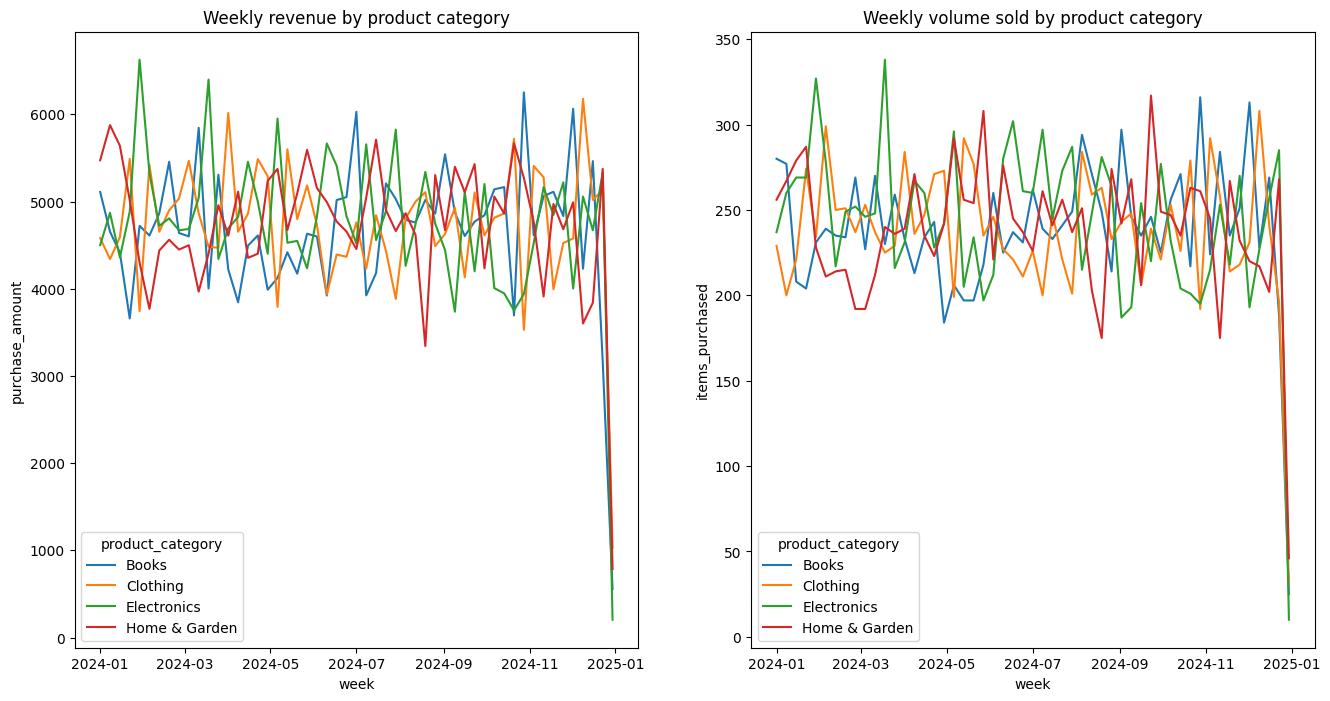

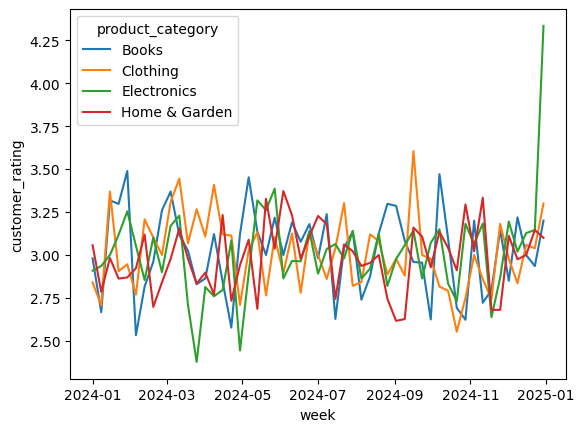

In [6]:
# Question 1:
# Explore this e-commerce dataset and provide basic insights about:
# - Product category performance

weekly_category = df.copy()
weekly_category['week'] = weekly_category['date'].dt.to_period('W').dt.start_time

weekly_category_sales = weekly_category.groupby(['week', 'product_category']).agg({
    'purchase_amount': 'sum',
    'items_purchased': 'sum'
})
weekly_category_rating = weekly_category.groupby(['week', 'product_category']).agg({
    'customer_rating': 'mean',
})
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=False, sharex=False)
sns.lineplot(
    data=weekly_category_sales,
    x='week',
    y='purchase_amount',
    hue='product_category',
    ax=axes[0]
)
axes[0].set_title('Weekly revenue by product category')

sns.lineplot(
    data=weekly_category_sales,
    x='week',
    y='items_purchased',
    hue='product_category',
    ax=axes[1]
)
axes[1].set_title('Weekly volume sold by product category')

plt.show()
sns.lineplot(
    data=weekly_category_rating,
    x='week',
    y='customer_rating',
    hue='product_category',
)
plt.show()


# Question 1

Overall sales trend

The weekly series for sales and items purchased remains relatively stable. Weekly sales typically sum between $18,000 and $20,000, and the number of items purchased ranges from 900 to 1,100. This indicates that customer purchasing behavior has been steady over time.

Short-term spikes and volatility may correspond to promotions, holidays, or seasonal buying pattern, for example, families purchasing gear for spring break or during the back-to-school period.

At the end of the period available in the dataset, there is a sharp drop in early January 2025. This is most likely due to missing data for that month, rather than a real crash in sales.

Customer segment distribution

The first chart shows the distribution of customers across segments. It's clear that the customer base is balanced, which is beneficial for analysis because it reduces bias when comparing behaviors between segments.

In the bottom chart, it's visible that the purchase amount, items purchased, and customer rating averages do not vary significantly between segments. However, the standard deviation for the purchase amount is noteworthy, around 30 with a mean of 100, indicating a 30% variance, which is relatively high.

Product category performance

To analyze product category performance, I initially looked at overall revenue, volume sold, and customer ratings, but realized that this static approach wasn't insightful enough. So, I decided to analyze how these variables change over time.

This time-based analysis reveals that Electronics show consistent and higher spikes in both sales and volume. In contrast, Clothing has lower and less frequent spikes compared to other categories.

From the customer satisfaction chart, based on average ratings, highlights a notable increase in positive reviews for Electronic products in early 2025.

C:\Users\Pedro Cunha\AppData\Local\Temp\ipykernel_7068\765196756.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_purchase_customer_segment = df.groupby('customer_segment')['purchase_amount'].mean()
C:\Users\Pedro Cunha\AppData\Local\Temp\ipykernel_7068\765196756.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales = monthly_sales.groupby(['month', 'product_category'])['purchase_amount'].sum().reset_index()


customer_segment
New         99.733038
Premium    100.229132
Regular     99.821424
Name: purchase_amount, dtype: float64


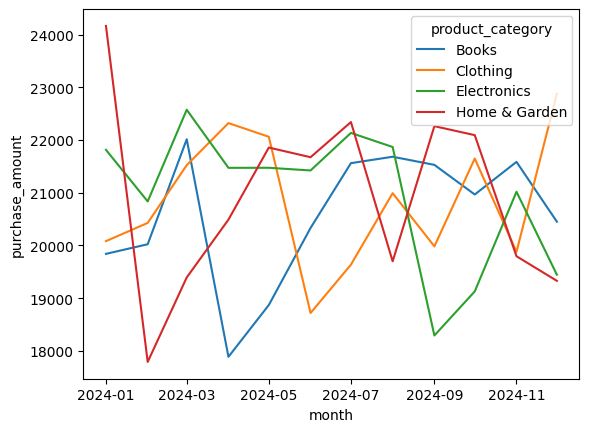

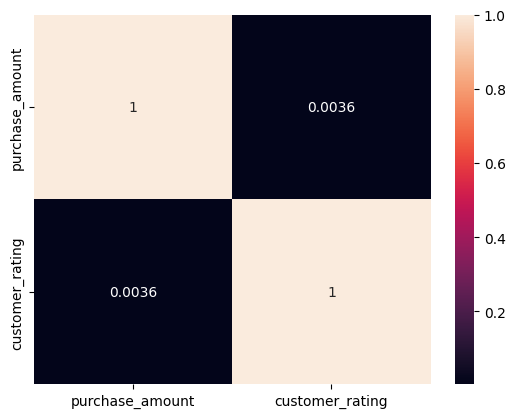

In [14]:
# Question 2:
# Calculate the following:
# - Average purchase amount per customer segment
# - Monthly sales trends
# - Correlation between purchase amount and customer rating
# - Use a simple method to predict Electronics sales in the 2 months following the data set. 
# You can use a quick & simply methodology, 
# but indicate in writing how you'd improve the prediction if you had more time.

average_purchase_customer_segment = df.groupby('customer_segment')['purchase_amount'].mean()
print(average_purchase_customer_segment)

monthly_sales = df.copy()
monthly_sales['month'] = monthly_sales['date'].dt.to_period('M').dt.start_time
monthly_sales = monthly_sales.groupby(['month', 'product_category'])['purchase_amount'].sum().reset_index()
sns.lineplot(
    data=monthly_sales,
    x='month',
    y='purchase_amount',
    hue='product_category'
)
plt.show()

corr = df[['purchase_amount', 'customer_rating']].corr()
sns.heatmap(data=corr, annot=True)
plt.show()

In [ ]:
!pip install --upgrade pip
!pip install statsmodels

In [13]:
import statsmodels.formula.api as smf

eletronics = df[df['product_category'] == 'Electronics'] 
monthly_sales = eletronics.resample('M', on='date')['purchase_amount'].sum().reset_index()
monthly_sales['month_num'] = range(len(monthly_sales))

model = smf.ols('purchase_amount ~ month_num', data=monthly_sales).fit()
print(model.summary())

predict_df = pd.DataFrame({'month_num': [len(monthly_sales), len(monthly_sales)+1]})
predict_df = predict_df.assign(purchase_amount=model.predict(predict_df))
print(predict_df)


                            OLS Regression Results                            
Dep. Variable:        purchase_amount   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     5.590
Date:                Mon, 19 May 2025   Prob (F-statistic):             0.0397
Time:                        19:58:06   Log-Likelihood:                -100.03
No. Observations:                  12   AIC:                             204.1
Df Residuals:                      10   BIC:                             205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.216e+04    600.378     36.908      0.0

C:\Users\Pedro Cunha\AppData\Local\Temp\ipykernel_7068\3095939259.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = eletronics.resample('M', on='date')['purchase_amount'].sum().reset_index()
e:\Desenvolvimento\Pessoal\machine-learning\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=12 observations were given.
  return hypotest_fun_in(*args, **kwds)


# Question 2

Average purchase amount per customer segment

| Customer Segment | Average Purchase Amount |
|------------------|--------------------------|
| New              | 99.733038                |
| Premium          | 100.229132               |
| Regular          | 99.821424                |

It tell us that average purchase amount is balanced between the customer segments.

Monthly sales trend

Books sales fluctuate but tend to dip mid-year before recovering, This possible reflect typical consumer buying behaviors in the country those datas was collected.

The sales across all categories do not exhibit a consistent upward or downward trend but show noticeable peaks and troughs that could relate to seasonal buying behavior, promotional events, or external factors.

Correlation between purchase amount and customer rating

The correlation coefficient is abount 0.003, which is extremely low, this means no linear correlation between those variables, this two variables act independently.

Predicting Electronics sales in 2 months.

I used a simple linear regression method using statsmodel which predicted 19535 sales for month 12 and 19316 sales for month 13 (01, January)
For more accurate predictions we would need more time to study the characteristics available for training and have a longer data history, since the one available runs from 2024 to January 2025. Currently there is no validation, the model is trained on all the data and a better approach is to use the train-test split method, in addition to which it is possible to evaluate the model with some statistical metrics to adapt and perhaps test other forecasting algorithms.

# Question 3


Create visualizations to show:
- Monthly sales trends by product category
- Distribution of purchase amounts
- Customer ratings distribution by segment

C:\Users\Pedro Cunha\AppData\Local\Temp\ipykernel_7068\3401319353.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales = monthly_sales.groupby(['month', 'product_category']).agg({


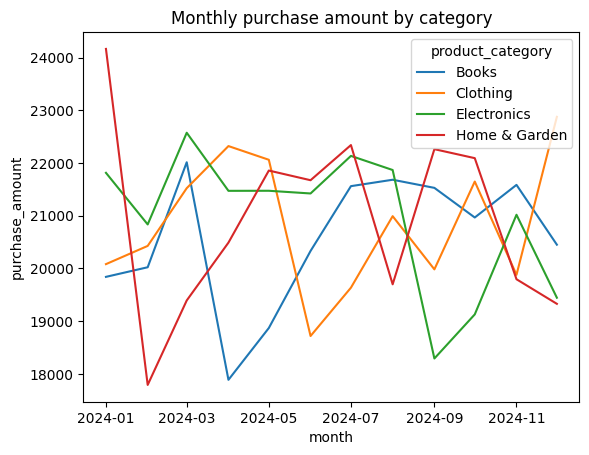

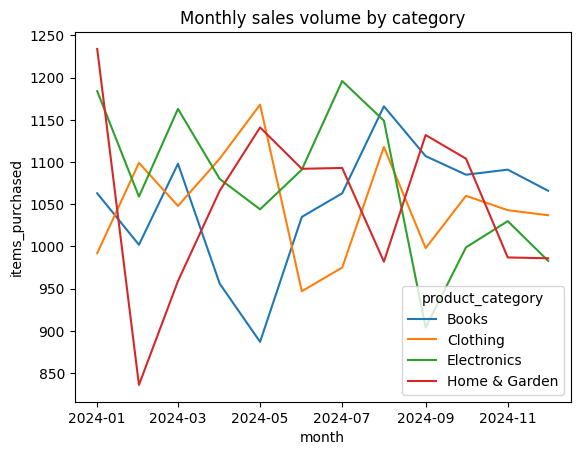

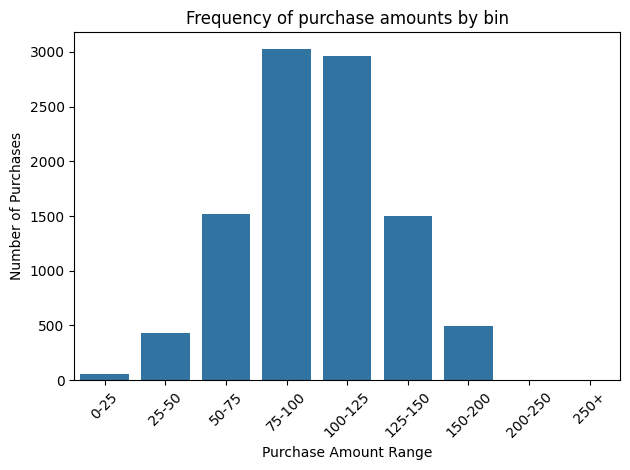

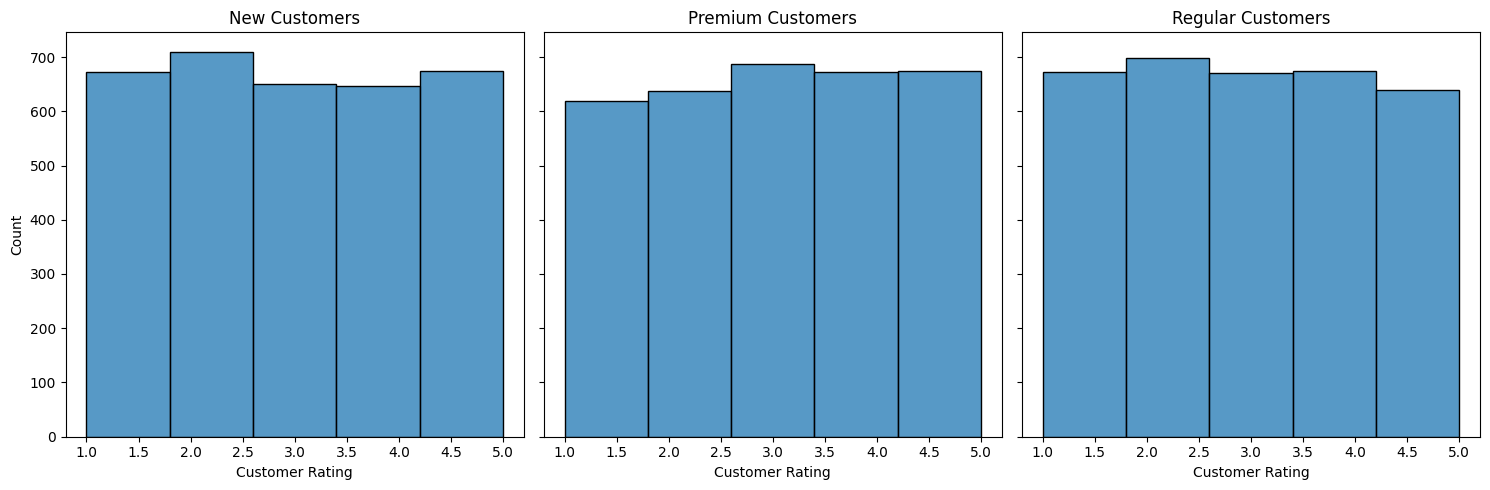

In [10]:
monthly_sales = df.copy()
monthly_sales['month'] = monthly_sales['date'].dt.to_period('M').dt.start_time
monthly_sales = monthly_sales.groupby(['month', 'product_category']).agg({
    'purchase_amount': 'sum',
    'items_purchased': 'sum'
}).reset_index()

sns.lineplot(
    data=monthly_sales,
    x='month',
    y='purchase_amount',
    hue='product_category'
)
plt.title('Monthly purchase amount by category')
plt.show()
sns.lineplot(
    data=monthly_sales,
    x='month',
    y='items_purchased',
    hue='product_category'
)
plt.title('Monthly sales volume by category')
plt.show()

#Defining bins and labels manually in this case
bins = [0, 25, 50, 75, 100, 125, 150, 200, 250, float('inf')]
labels = ['0-25', '25-50', '50-75', '75-100', '100-125', '125-150', '150-200', '200-250', '250+']

df['purchase_bin'] = pd.cut(df['purchase_amount'], bins=bins, labels=labels, right=False)
sns.countplot(data=df, x='purchase_bin', order=labels)
plt.title('Frequency of purchase amounts by bin')
plt.xlabel('Purchase Amount Range')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

segments = ['New', 'Premium', 'Regular']
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
for i, segment in enumerate(segments):
    sns.histplot(
        data=df[df['customer_segment'] == segment],
        x='customer_rating',
        bins=5,
        ax=axes[i],
    )
    axes[i].set_title(f'{segment} Customers')
    axes[i].set_xlabel('Customer Rating')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Question 4

In [ ]:
print(segmented_customer_type)
segmented_customer_sum = df.groupby('customer_segment').agg({
    'purchase_amount': sum,
    'items_purchased': sum
}).reset_index()
print(segmented_customer_sum)

In [ ]:
# Consolidating information already processed

to_revenue = df.groupby('product_category').agg({
    'purchase_amount': ['sum'],
}).reset_index()
print(to_revenue)

Based on your analysis:
- Which customer segment is most valuable?

Based on total revenue, regular customers generated the highest total revenue.
But, premium customers had highest average purchase amount and rating. However, the differences are negligible accross all segments, theres no way to strongly determine which one is most valuable based only in this dataset.

- What is the best-performing product category?

Electronics lead with highest total revenue, in volability over time, Books and Clothing show more volability than Electronics, which has relatively consistent sales with fewer dramatic drops, only observe in 09/2024.

- Any recommendations for improving sales?

With the analysis, its possible approach some strategies:

- Investigate and Improve Books

Books show lowest revenue, this can be changed exploring if there's a niche audience in the sales and boosting this with promotions or visibility.
It can be achieved with A/B tests for pricing and visibility.

- Promotions based in customer segment

From the analysis, there's no major purchase differences between customer segments, but they can respond differently to promotions.
Offer first-purchase discounts can increase the sales for New customers, while creating loyality incentives for New and Regular customers can improve the retention.